In [162]:
from IPython.display import HTML# Hide code
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [163]:
import numpy as np
import pandas as pd

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [165]:
import plotly.plotly as py
import plotly.graph_objs as go
#import plotly.tools as tls
#tls.set_credentials_file(username='drozen', api_key='GTP8SX2KBqr3loYdTVb6')

In [166]:
df = pd.read_csv('data/CC2017.csv')

In [167]:
df = df[df['Transaction']=='DEBIT'] 
df = df[df['Memo'].notnull()] # remove null entries

In [219]:
# credit card payments
dfCr = pd.read_csv('data/CC2017.csv')
dfCr = dfCr[dfCr['Transaction']=='CREDIT'] 
dfCR= dfCr[dfCr['Memo'].notnull()] # remove null entries

In [169]:
dfCr[dfCr['Name']!='PREAUTHORIZED PAYMENT'].sum()[4]  # amount of returns

2535.68

In [220]:
dfCr[dfCr['Name']!='PREAUTHORIZED PAYMENT'].head(5)

,Transaction date,Transaction,Name,Memo,Amount
8,1/3/2017,CREDIT,HOMESENSE 107 TORONTO ON,Rewards earned: -0.17 ~ Category: Other,16.95
9,1/3/2017,CREDIT,HOMESENSE 107 TORONTO ON,Rewards earned: -0.23 ~ Category: Other,22.59
31,1/15/2017,CREDIT,COSTCO WHOLESALE W535 TORONTO ON,Rewards earned: -1.72 ~ Category: Other,171.70
132,3/19/2017,CREDIT,WINNERS 202 TORONTO ON,Rewards earned: -0.28 ~ Category: Other,28.24
134,3/19/2017,CREDIT,CARTER'S OSHKOSH #4 TORONTO ON,Rewards earned: -0.71 ~ Category: Other,70.56


In [221]:
dfPay = dfCr[dfCr['Name']=='PREAUTHORIZED PAYMENT']

In [226]:
dfPay.count()[0]

11

In [225]:
dfPay.sum()[4]

35202.2

In [217]:
(dfPay.sum()[4] - dfCr[dfCr['Name']!='PREAUTHORIZED PAYMENT'].sum()[4] + 3227.75 - 1320) /12   # total amount spent per month

2881.1891666666666

In [175]:
df['Amount'] = df['Amount'].apply(pd.to_numeric, errors='coerce') *-1 #convert to int and convert amounts to positive
df['Transaction date'] = pd.to_datetime(df['Transaction date']) # get date info
df['Month'] = df['Transaction date'].apply(lambda x : x.month)
df['Day'] = df['Transaction date'].apply(lambda x : x.day)
df['Day of Week'] = df['Transaction date'].apply(lambda x : x.dayofweek)
df.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week
0,2017-01-01,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.21 ~ Category: Other,21.00,1,1,6
1,2017-01-02,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.42 ~ Category: Other,42.00,1,2,0
2,2017-01-02,DEBIT,NOFRILLS PATS 1330 NORTH YORK ON,Rewards earned: 2.46 ~ Category: Groceries,123.07,1,2,0
3,2017-01-02,DEBIT,ESSO ORONO ON,Rewards earned: 0.42 ~ Category: Gas,21.04,1,2,0
4,2017-01-03,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.17 ~ Category: Groceries,8.49,1,3,1


In [176]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
DayOfWeek = list(map(lambda var: dmap[var],df['Day of Week']))
df['Day of Week'] = DayOfWeek
df.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week
0,2017-01-01,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.21 ~ Category: Other,21.00,1,1,Sun
1,2017-01-02,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.42 ~ Category: Other,42.00,1,2,Mon
2,2017-01-02,DEBIT,NOFRILLS PATS 1330 NORTH YORK ON,Rewards earned: 2.46 ~ Category: Groceries,123.07,1,2,Mon
3,2017-01-02,DEBIT,ESSO ORONO ON,Rewards earned: 0.42 ~ Category: Gas,21.04,1,2,Mon
4,2017-01-03,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.17 ~ Category: Groceries,8.49,1,3,Tue



# Transaction types

In [177]:
def returnCategory(x):
    return x.split(' ~ Category: ')[1]

def returnName(x):
    return x.split(' ')[0]

In [178]:
# create category column
df['Category']=df['Memo'].apply(returnCategory)

# create single name column
df['Single Name']=df['Name'].apply(returnName)

df.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
0,2017-01-01,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.21 ~ Category: Other,21.00,1,1,Sun,Other,GROUPON
1,2017-01-02,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.42 ~ Category: Other,42.00,1,2,Mon,Other,GROUPON
2,2017-01-02,DEBIT,NOFRILLS PATS 1330 NORTH YORK ON,Rewards earned: 2.46 ~ Category: Groceries,123.07,1,2,Mon,Groceries,NOFRILLS
3,2017-01-02,DEBIT,ESSO ORONO ON,Rewards earned: 0.42 ~ Category: Gas,21.04,1,2,Mon,Gas,ESSO
4,2017-01-03,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.17 ~ Category: Groceries,8.49,1,3,Tue,Groceries,SAVOURS


In [216]:
df['Name'].value_counts().head(25)

SAVOURS FRESH MARKET L NORTH YOR    65
NOFRILLS PATS 1330 NORTH YORK ON    39
ESSO NORTH YORK ON                  34
SHOPPERS DRUG MART #08 NORTH YOR    22
VESTA *CHATR 888-278-5588 BC        21
COSTCO WHOLESALE W535 TORONTO ON    20
WAL-MART # 3105 TORONTO ON          15
URTH FINE FOODS INC NORTH YORK O    13
DR LAFFA ON THE GO TORONTO ON       12
METRO #52 NORTH YORK ON             12
SUN LIFE CHOICES A&A 800-669-792    12
HERMES BAKERY LTD NORTH YORK ON     11
KEEPCALLING COM 866-5358095 GA U     9
ABE'S SERVICE CENTRE NORTH YORK      8
Amazon *Marketplce CA WWW.AMAZON     8
FORTINO'S NORTH YORK ON              7
AROMA BATHUST & WILSON NORTH YOR     7
TSI INTERNET CHATHAM ON              6
BAIS YAAKOV ELEMENTARY 416-78361     6
IKEA NORTH YORK NORTH YORK ON        6
OLD NAVY CANADA ONLINE BOLTON ON     6
PAYPAL *NEEMANFOUND 4029357733 O     6
OLDNAVY.COM 2944 505-462-0076 ON     6
MASTERMIND- YONGE STRE TORONTO O     5
BACK IN ACTION NORTH YORK ON         5
Name: Name, dtype: int64

# find total Tangerine category (eg. gas) purchases for the year

In [180]:
df['Memo'].apply(returnCategory).value_counts()

Other               245
Groceries           153
Gas                  55
Restaurant           50
Bill Payment         45
Drug Store           31
Parking              17
Furniture             9
Home Improvement      8
Hotel                 2
Name: Memo, dtype: int64

In [227]:
dfCat = df.groupby(['Category','Day of Week']).sum()
dfCatUnstacked = dfCat.unstack()['Amount']


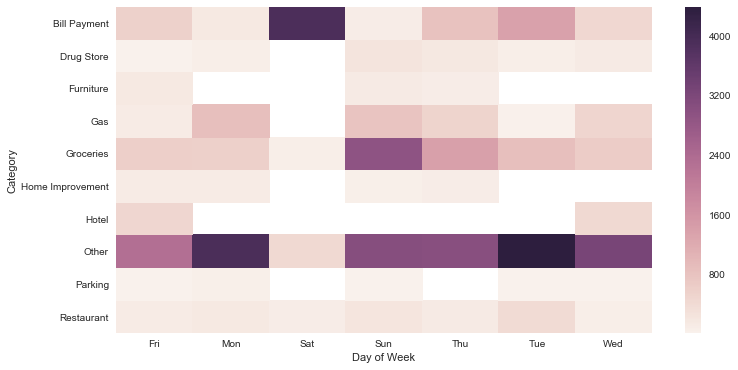

In [182]:
plt.figure(figsize=(12,6))
sns.heatmap(dfCatUnstacked)

In [183]:
#sns.clustermap(dfCatUnstacked)

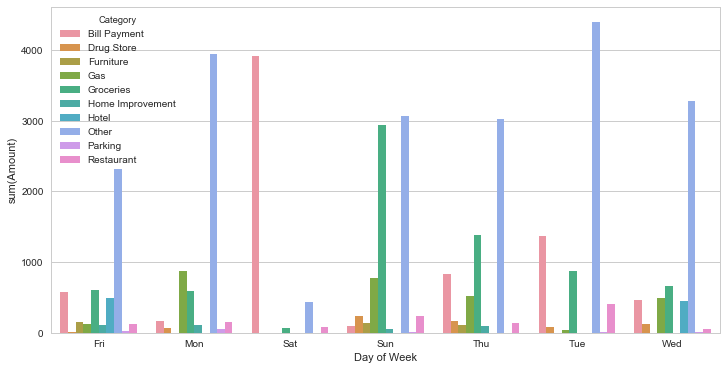

In [184]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(ax=ax, x='Day of Week', y = 'Amount', data = dfCat.reset_index(), hue = 'Category', estimator=sum
    )
#plt.tight_layout()

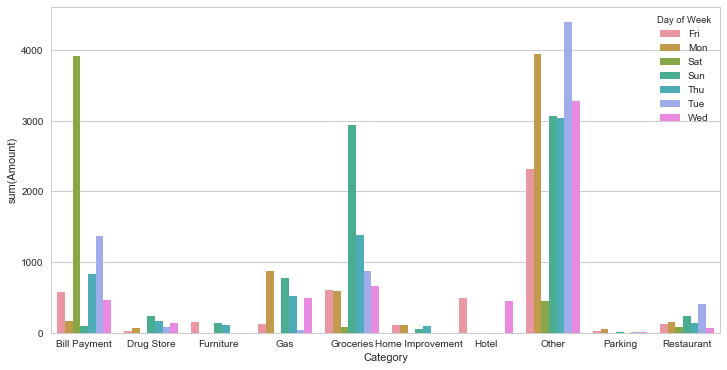

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(x='Category', y = 'Amount', data = dfCat.reset_index(), hue = 'Day of Week', estimator=sum, ax=ax)

In [186]:
categoryList = df['Memo'].apply(returnCategory).unique()

In [187]:
categoryList

array(['Other', 'Groceries', 'Gas', 'Bill Payment', 'Drug Store',
       'Restaurant', 'Home Improvement', 'Furniture', 'Parking', 'Hotel'], dtype=object)

In [188]:
nameAmtDict = {}
def nameAmt(name, df=df):
    dfCat = df[df['Name'].apply(returnName)==name]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['Amount'].sum()*1,2)
    #print("%.2f" % returnVal)
    return round(returnVal, 2)

In [189]:
def updateDict(name):
    nameAmtDict[name] = nameAmt(name)

In [190]:
df['Name'].apply(returnName).value_counts().head(20)                                   

SAVOURS        65
NOFRILLS       39
ESSO           38
SHOPPERS       27
VESTA          21
THE            20
WAL-MART       20
COSTCO         20
DR             14
URTH           13
METRO          12
SUN            12
PETROCAN       11
HERMES         11
PAYPAL          9
KEEPCALLING     9
Amazon          8
OLD             8
ABE'S           8
DOLLARAMA       7
Name: Name, dtype: int64

In [191]:
nameList = ["ABE'S", "PERSONAL", "NOFRILLS", "ESSO", "COSTCO", "WAL-MART", "WINNERS", "CARTER'S", "SAVOURS", "DR", "URTH", "HERMES"]
nameAmtDict = {}
for name in nameList:
    updateDict(name)
nameAmtDict

{"ABE'S": 1852.37,
 "CARTER'S": 318.99,
 'COSTCO': 2872.2,
 'DR': 662.75,
 'ESSO': 2009.53,
 'HERMES': 161.76,
 'NOFRILLS': 4036.14,
 'PERSONAL': 3507.0,
 'SAVOURS': 1956.39,
 'URTH': 203.28,
 'WAL-MART': 839.1,
 'WINNERS': 234.36}

In [192]:
nameList = ["BACK", "BAIS", "SUN", "PREAUTHORIZED"]
nameAmtDict = {}
for name in nameList:
    updateDict(name)
nameAmtDict

{'BACK': 360.0, 'BAIS': 1425.0, 'PREAUTHORIZED': 0.0, 'SUN': 3027.84}

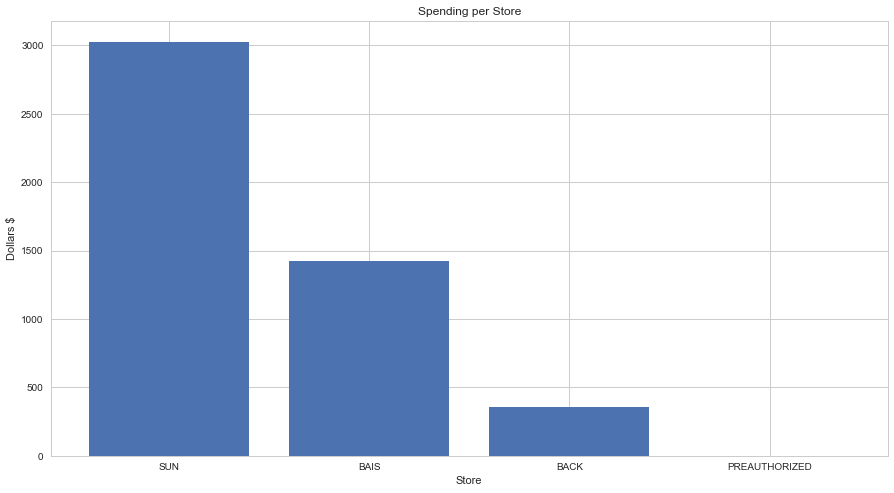

In [193]:
D = nameAmtDict

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Spending per Store")
plt.xlabel("Store")
plt.ylabel("Dollars $")
plt.figure(figsize=(100,100))

plt.show()

In [194]:
labels=list(D.keys())
values=list(D.values())
trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

In [195]:
categoryAmtDict = {}
def categoryAmt(category, df=df):
    dfCat = df[df['Memo'].apply(returnCategory)==category]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['Amount'].sum()*1,2)
    print("%.2f" % returnVal)
    return round(returnVal, 2)

In [196]:
def updateDict(category):
    categoryAmtDict[category] = categoryAmt(category)

In [197]:
for cat in categoryList:
    updateDict(cat)

20451.02
7112.79
2825.36
7398.53
688.69
1186.69
372.66
405.30
113.07
941.00


In [198]:
categoryAmtDict

{'Bill Payment': 7398.53,
 'Drug Store': 688.69,
 'Furniture': 405.3,
 'Gas': 2825.36,
 'Groceries': 7112.79,
 'Home Improvement': 372.66,
 'Hotel': 941.0,
 'Other': 20451.02,
 'Parking': 113.07,
 'Restaurant': 1186.69}

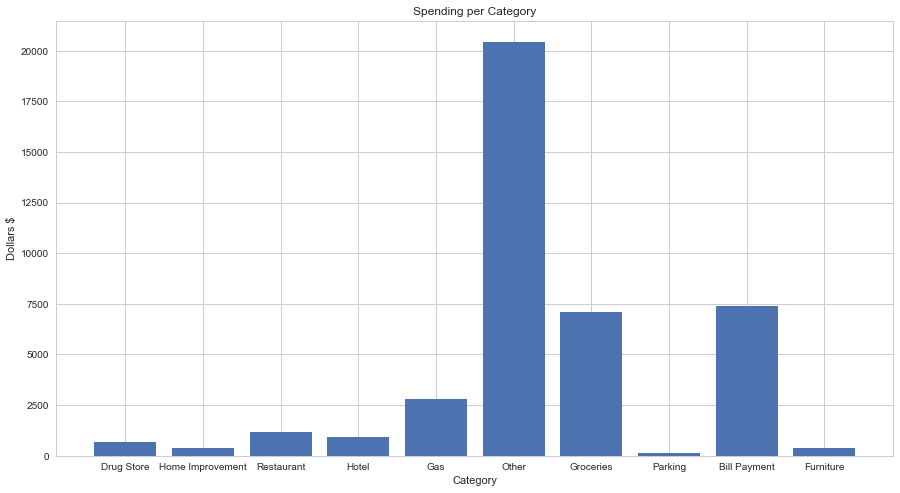

In [199]:
D = categoryAmtDict

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Spending per Category")
plt.xlabel("Category")
plt.ylabel("Dollars $")
#plt.figure(figsize=(100,100))

plt.show()

In [200]:
labels=list(D.keys())
values=list(D.values())
trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

Find Abes records

In [201]:
dfAbes = df[df['Name'].apply(lambda x: x.split(' ')[0])=="ABE'S"]

In [202]:
dfAbes

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
23,2017-01-09,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 4.53 ~ Category: Other,453.13,1,9,Mon,Other,ABE'S
78,2017-02-14,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 0.71 ~ Category: Other,71.18,2,14,Tue,Other,ABE'S
210,2017-05-02,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 0.51 ~ Category: Other,101.70,5,2,Tue,Other,ABE'S
229,2017-05-16,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 0.17 ~ Category: Other,33.90,5,16,Tue,Other,ABE'S
296,2017-06-22,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 1.19 ~ Category: Other,237.30,6,22,Thu,Other,ABE'S
462,2017-09-26,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 0.97 ~ Category: Other,193.54,9,26,Tue,Other,ABE'S
476,2017-10-02,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 3.30 ~ Category: Other,659.92,10,2,Mon,Other,ABE'S
653,2017-12-28,DEBIT,ABE'S SERVICE CENTRE NORTH YORK,Rewards earned: 0.51 ~ Category: Other,101.70,12,28,Thu,Other,ABE'S


In [203]:
dfSavours = df[df['Name'].apply(lambda x: x.split(' ')[0])=="SAVOURS"]

In [204]:
dfSavours

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
4,2017-01-03,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.17 ~ Category: Groceries,8.49,1,3,Tue,Groceries,SAVOURS
17,2017-01-05,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.11 ~ Category: Groceries,5.61,1,5,Thu,Groceries,SAVOURS
20,2017-01-06,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.34 ~ Category: Groceries,16.89,1,6,Fri,Groceries,SAVOURS
29,2017-01-11,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.33 ~ Category: Groceries,16.49,1,11,Wed,Groceries,SAVOURS
35,2017-01-19,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.86 ~ Category: Groceries,42.76,1,19,Thu,Groceries,SAVOURS
47,2017-01-26,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.20 ~ Category: Groceries,9.76,1,26,Thu,Groceries,SAVOURS
52,2017-01-31,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.06 ~ Category: Groceries,2.99,1,31,Tue,Groceries,SAVOURS
69,2017-02-10,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 1.00 ~ Category: Groceries,50.14,2,10,Fri,Groceries,SAVOURS
79,2017-02-15,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.11 ~ Category: Groceries,5.48,2,15,Wed,Groceries,SAVOURS
83,2017-02-17,DEBIT,SAVOURS FRESH MARKET L NORTH YOR,Rewards earned: 0.35 ~ Category: Groceries,17.40,2,17,Fri,Groceries,SAVOURS


Investigate BillPayment category transactions

In [205]:
dfBill = df[df['Memo'].apply(returnCategory)=="Bill Payment"]

In [206]:
dfBill.head(10)

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
5,2017-01-03,DEBIT,SUN LIFE CHOICES A&A 800-669-792,Rewards earned: 5.05 ~ Category: Bill Payment,252.32,1,3,Tue,Bill Payment,SUN
16,2017-01-04,DEBIT,UBER CA JAN04 WYWLC HE help.uber,Rewards earned: 0.25 ~ Category: Bill Payment,12.67,1,4,Wed,Bill Payment,UBER
48,2017-01-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,1,26,Thu,Bill Payment,VESTA
55,2017-02-02,DEBIT,SUN LIFE CHOICES A&A 800-669-792,Rewards earned: 5.05 ~ Category: Bill Payment,252.32,2,2,Thu,Bill Payment,SUN
82,2017-02-17,DEBIT,PERSONAL INSURANCE COM MISSISSAU,Rewards earned: 3.78 ~ Category: Bill Payment,189.00,2,17,Fri,Bill Payment,PERSONAL
96,2017-02-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,2,26,Sun,Bill Payment,VESTA
102,2017-03-02,DEBIT,SUN LIFE CHOICES A&A 800-669-792,Rewards earned: 5.05 ~ Category: Bill Payment,252.32,3,2,Thu,Bill Payment,SUN
139,2017-03-26,DEBIT,VESTA *CHATR 888-278-5588 BC,Rewards earned: 0.57 ~ Category: Bill Payment,28.25,3,26,Sun,Bill Payment,VESTA
158,2017-04-04,DEBIT,SUN LIFE CHOICES A&A 800-669-792,Rewards earned: 5.05 ~ Category: Bill Payment,252.32,4,4,Tue,Bill Payment,SUN
172,2017-04-08,DEBIT,PERSONAL INSURANCE COM MISSISSAU,Rewards earned: 64.12 ~ Category: Bill Payment,3206.00,4,8,Sat,Bill Payment,PERSONAL


In [207]:
dfOther = df[df['Memo'].apply(returnCategory)=="Other"]

In [208]:
dfOther.head(80)

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
0,2017-01-01,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.21 ~ Category: Other,21.00,1,1,Sun,Other,GROUPON
1,2017-01-02,DEBIT,GROUPON CANADA INC 877-788-7858,Rewards earned: 0.42 ~ Category: Other,42.00,1,2,Mon,Other,GROUPON
6,2017-01-03,DEBIT,GAP OUTLET 1786 TORONTO ON,Rewards earned: 0.13 ~ Category: Other,12.98,1,3,Tue,Other,GAP
7,2017-01-03,DEBIT,WINNERS 319 TORONTO ON,Rewards earned: 0.31 ~ Category: Other,30.51,1,3,Tue,Other,WINNERS
10,2017-01-03,DEBIT,ARDENE #453 TORONTO ON,Rewards earned: 0.15 ~ Category: Other,15.26,1,3,Tue,Other,ARDENE
11,2017-01-03,DEBIT,REITMANS #94 TORONTO ON,Rewards earned: 0.18 ~ Category: Other,18.08,1,3,Tue,Other,REITMANS
12,2017-01-03,DEBIT,DYNAMITE #289 TORONTO ON,Rewards earned: 0.23 ~ Category: Other,22.60,1,3,Tue,Other,DYNAMITE
15,2017-01-04,DEBIT,MIRIAMS GIFT GALLERY TORONTO ON,Rewards earned: 0.36 ~ Category: Other,35.70,1,4,Wed,Other,MIRIAMS
18,2017-01-05,DEBIT,DR. SAMUEL AXELROD & A NORTH YOR,Rewards earned: 1.03 ~ Category: Other,103.20,1,5,Thu,Other,DR.
21,2017-01-08,DEBIT,COSTCO WHOLESALE W535 TORONTO ON,Rewards earned: 1.01 ~ Category: Other,101.48,1,8,Sun,Other,COSTCO


In [209]:
dfOld= dfOther[dfOther['Name'].apply(lambda x: x.split(' ')[0])=="HOMESENSE"]
dfOld.head()

,Transaction date,Transaction,Name,Memo,Amount,Month,Day,Day of Week,Category,Single Name
111,2017-03-07,DEBIT,HOMESENSE 107 TORONTO ON,Rewards earned: 0.34 ~ Category: Other,33.88,3,7,Tue,Other,HOMESENSE
125,2017-03-13,DEBIT,HOMESENSE 107 TORONTO ON,Rewards earned: 0.58 ~ Category: Other,57.60,3,13,Mon,Other,HOMESENSE


# Investigate sums by names

In [210]:
byName = df.groupby('Name')
byName.sum()

,Amount,Month,Day
Name,,,
123InkCartridges.ca LACHINE QC,66.74,3,29
3M LAWRENCE PHARMACY NORTH YORK,65.27,1,5
407ETR-INTERNET WOODBRIDGE ON,9.82,3,10
ABE'S SERVICE CENTRE NORTH YORK,1852.37,50,119
AIR-SERV A 225455 TORONTO ON,1.50,5,15
AIRBNB * HMN2X2N8KC Trip details,487.00,5,19
AIRBNB * HMNRBEKA5A Trip details,454.00,5,17
AISH TANOOR TORONTO ON,3.26,7,28
APL* ITUNES.COM/BILL 800-676-277,11.98,8,7


In [211]:
df.groupby('Single Name').sum()

,Amount,Month,Day
Single Name,,,
123InkCartridges.ca,66.74,3,29
3M,65.27,1,5
407ETR-INTERNET,9.82,3,10
ABE'S,1852.37,50,119
AIR-SERV,1.50,5,15
AIRBNB,941.00,10,36
AISH,3.26,7,28
APL*,11.98,8,7
AQUARIUM,12.42,5,15


###### Report sums only for purchases > 6

In [212]:
df.groupby('Single Name').sum()[df.groupby('Single Name').count()['Name']>4]

,Amount,Month,Day
Single Name,,,
ABE'S,1852.37,50,119
AROMA,77.62,57,95
Amazon,173.28,63,60
BACK,360.00,57,89
BAIS,1425.00,60,51
CARTER'S,318.99,14,75
CDN,330.90,44,84
COSTCO,2872.20,128,270
DOLLARAMA,124.25,68,102


In [213]:
dfmean = df.groupby('Single Name').mean()[df.groupby('Single Name').count()['Name']>6]
dfmean.reset_index() #turn index into a column

,Single Name,Amount,Month,Day
0,ABE'S,231.546250,6.250000,14.875000
1,AROMA,11.088571,8.142857,13.571429
2,Amazon,21.660000,7.875000,7.500000
3,COSTCO,143.610000,6.400000,13.500000
4,DOLLARAMA,17.750000,9.714286,14.571429
5,DR,47.339286,6.714286,17.357143
6,ESSO,52.882368,6.447368,17.263158
7,FORTINO'S,30.390000,7.000000,15.571429
8,HERMES,14.705455,6.454545,17.454545
9,KEEPCALLING,5.000000,6.222222,21.333333


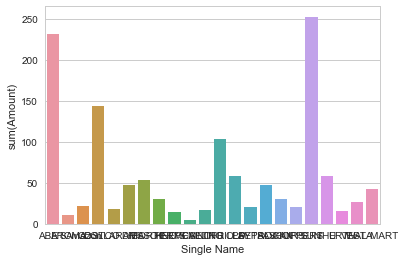

In [214]:
ax = sns.barplot(x='Single Name', y='Amount',data=dfmean.reset_index(),estimator=sum)

# BMO Mastercard data

In [215]:
df1 = pd.read_csv('MosaikRemaningData2016.csv')

IOError: File MosaikRemaningData2016.csv does not exist

In [ ]:
df1backup = df1

In [ ]:
df1backup.info()

In [ ]:
df1 = df1[df1['DESCRIPTION'].notnull()] # remove null entries
df1.info()

In [ ]:
df1.head(15)


# Transaction types

In [ ]:
descriptionAmtDict = {}
def descriptionAmt(description, df=df1):
    dfCat = df[df['DESCRIPTION'].apply(returnName)==description]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['AMOUNT ($)'].sum(),2)
    print("%.2f" % returnVal)
    return round(returnVal, 2)

In [ ]:
def updateDictBMO(description):
    descriptionAmtDict[description] = descriptionAmt(description)

In [ ]:
df1['DESCRIPTION'].value_counts().head(25)      

In [ ]:
df1['DESCRIPTION'].apply(returnName).value_counts().head(15)                                   

In [ ]:
descriptionList = ["SAVOURS", "COSTCO", "NOFRILLS", "SHOPPERS", "WAL-MART", "ESSO", "CARTER'S", "OLD", "CDN"]

In [ ]:
for description in descriptionList:
    updateDictBMO(description)

In [ ]:
descriptionAmtDict

In [ ]:
D = descriptionAmtDict

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Spending per Store")
plt.xlabel("Store")
plt.ylabel("Dollars $")
plt.figure(figsize=(100,100))

plt.show()

In [ ]:
labels=list(D.keys())
values=list(D.values())

# Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(values, labels=labels, shadow=True, startangle=140, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

In [ ]:
labels=list(D.keys())
values=list(D.values())
trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

In [ ]:
# Display attribution
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Daniel Rozen.
</footer>''')